In [1]:
from bs4 import BeautifulSoup

In [2]:
with open("source.html", encoding="utf-8") as fin:
    soup = BeautifulSoup(fin.read(), "html.parser")

In [3]:
import re

In [4]:
rule = re.compile(r"^lips_\d+_0_shade$")

In [5]:
lip_divs = soup.find_all(id=rule)

In [6]:
len(lip_divs)

2983

In [7]:
lip_divs[1]

<div class="shade_off" id="lips_1823251_0_shade" style="display: none;"><div class="c60" style="background: rgb(34, 62, 65);"></div><div class="tooltip" style="display: none; top: 355.424px; left: 714.091px; position: fixed;"><div class="up_caret"></div><div class="tooltiptext" style="min-width: 200px; max-width: 200px;">Amuse Bouche Lipstick Kale</div></div></div>

In [8]:
l = lip_divs[1]

In [9]:
l.findChild("div", {"class":lambda c : c == "c60" or c == "c60_on"}).get("style")

'background: rgb(34, 62, 65);'

In [10]:
for lip in lip_divs:
    child = lip.findChild("div", {"class":lambda c : c == "c60" or c == "c60_on"})
#     print(lip.get("id"), child if child is None else child.get("style"))
    if child is None:
        print(lip.get("id"))

In [11]:
lips = {
    div.get("id") : div.findChild("div", {"class":lambda c : c == "c60" or c == "c60_on"}).get("style") 
    for div in lip_divs
}

In [12]:
lips = {
    k.lstrip("lips_").rstrip("_shade").rstrip("0").rstrip("_") : eval(v.lstrip("background: rgb").rstrip(";"))
    for k, v in lips.items()
}

In [13]:
lips

{'1928852': (58, 78, 80),
 '1823251': (34, 62, 65),
 '1805639': (24, 66, 67),
 '1914548': (1, 149, 157),
 '1972264': (7, 87, 103),
 '1959642': (10, 99, 125),
 '2068252': (140, 198, 215),
 '1960830': (110, 114, 116),
 '2036457': (19, 70, 87),
 '1688324': (12, 57, 82),
 '2026656': (42, 47, 50),
 '2036440': (32, 82, 98),
 '2028264': (74, 90, 99),
 '1890276': (44, 99, 153),
 '1794460': (64, 91, 114),
 '1899699': (62, 74, 90),
 '1823269': (54, 64, 76),
 '1735570': (134, 189, 234),
 '2042182': (219, 223, 226),
 '2068237': (226, 232, 245),
 '1884931': (108, 114, 128),
 '1853456': (39, 50, 92),
 '2018240': (35, 55, 88),
 '1704980': (69, 71, 88),
 '1933548': (57, 60, 137),
 '1900026': (30, 43, 98),
 '2036465': (28, 43, 121),
 '2144616': (106, 108, 145),
 '2018257': (109, 126, 214),
 '1958776': (201, 202, 227),
 '1914522': (117, 117, 151),
 '1934793': (58, 52, 159),
 '1908706': (41, 24, 174),
 '2026730': (41, 41, 71),
 '1962430': (40, 38, 135),
 '1934785': (57, 51, 96),
 '1914530': (66, 66, 78),

In [14]:
import json

In [15]:
with open("sku2rgb.json", "w", encoding="utf-8") as fout:
    json.dump(lips, fout)

---

dim reduction

In [16]:
import json

In [17]:
with open("sku2rgb.json", "r", encoding="utf-8") as fin:
    lips = json.load(fin)

In [18]:
import sklearn

In [19]:
import numpy as np

In [20]:
from sklearn.manifold import TSNE

In [21]:
sku2i = {
    k : i for i, k in enumerate(lips.keys())
}
i2sku = {
    i : k for k, i in sku2i.items()
}

In [22]:
i2rgb = {
    i : lips[i2sku[i]] for i in range(len(i2sku))
}

In [23]:
data = []
for i, rgb in i2rgb.items():
    data.append(rgb)

In [24]:
X = np.array(data)

In [25]:
X_embedded = TSNE(n_components=2).fit_transform(X)

In [26]:
X_embedded

array([[ 21.794209 , -72.17524  ],
       [ 21.0059   , -77.80369  ],
       [ 21.620571 , -77.73235  ],
       ...,
       [ 23.472565 , -78.302246 ],
       [ 26.636358 , -77.005295 ],
       [ 48.028095 ,  -2.8902419]], dtype=float32)

In [27]:
import pickle

In [28]:
data = {
    "sku2i" : sku2i,
    "i2sku" : i2sku,
    "i2rgb" : i2rgb,
    "raw"   : X,
    "reduced" : X_embedded,
}

In [29]:
with open("data.pkl", "wb") as fout:
    pickle.dump(data, fout)

---

vis

In [30]:
import pickle

In [31]:
import numpy as np

In [32]:
with open("data.pkl", "rb") as fin:
    data = pickle.load(fin)

In [33]:
sku2i, i2sku, i2rgb, raw, reduced = data["sku2i"], data["i2sku"], data["i2rgb"], data["raw"], data["reduced"]

In [34]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [35]:
%matplotlib inline

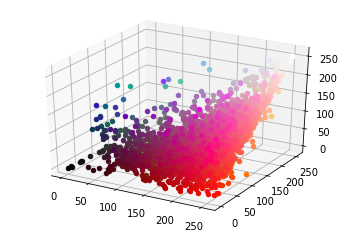

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(raw)):
    point = raw[i]
    rgb = tuple(c / 255 for c in raw[i])
    ax.scatter(point[0], point[1], point[2], color=rgb)
plt.show()

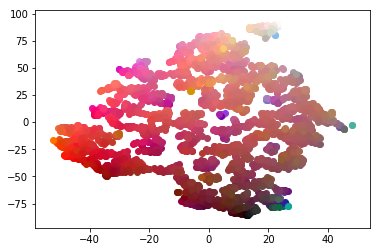

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(len(reduced)):
    point = reduced[i]
    rgb = tuple(c / 255 for c in raw[i])
    ax.scatter(point[0], point[1], color=rgb)
plt.show()

In [48]:
# %matplotlib notebook
# %matplotlib notebook

In [49]:
# from mpl_toolkits.mplot3d import Axes3D


# # What follows is a copy of the 3D plot example code.
# # Data is randomly generated so there is no external data import.

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# for i in range(len(raw)):
#     point = raw[i]
#     rgb = tuple(c / 255 for c in raw[i])
#     ax.scatter(point[0], point[1], point[2], color=rgb)
# plt.show()

In [60]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

scatter = go.Scatter3d(
    x=raw[:, 0],
    y=raw[:, 1],
    z=raw[:, 2],
    mode='markers',
    marker=dict(
        size=4,
        color=raw
    )
)

iplot([scatter])

---

In [40]:
from sklearn.cluster import SpectralClustering